# Data Visualization
Let's use an NFL dataset to take a look at some data visualization tools and graphs.

# Environment Setup
## Loading Dependencies

In [1]:
import pandas as pd
import os
import git

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import folium

/Users/matthewquinn/Library/Caches/pypoetry/virtualenvs/visualizations-umNhk9Xq-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Importing our NFL Dataset

In [2]:
# Read in the data
repo_root = Path(git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel"))

rosters_file = 'NFL 2018 Active Team Rosters.xlsx'
salaries_file = 'NFL 2017 Player Salaries.xlsx'
stadium_file = 'stadiums_nfl.csv'

rosters_path = f'{repo_root}/activities/visualizations/nfl-data/{rosters_file}'
salaries_path = f'{repo_root}/activities/visualizations/nfl-data/{salaries_file}'
stadium_path = f'{repo_root}/activities/visualizations/nfl-data/{stadium_file}'

rosters = pd.read_excel(rosters_path, index_col=None).drop(columns='ID')
salaries = pd.read_excel(salaries_path, index_col=0).reset_index()
stadiums = pd.read_csv(stadium_path, sep=';', usecols=['NAME', 'LATITUDE', 'LONGITUDE', 'TEAM'])

In [3]:
# Quick Data Exploration
display(rosters.head())
display(salaries.head())
display(stadiums.head())

,Player,#,Pos,HT,WT,Age,Exp,College,Team
0,Matt McCrane,1,K,2018-05-10 00:00:00,165.0,23.0,R,Kansas State,Arizona Cardinals
1,Andy Lee,2,P,2018-06-01 00:00:00,185.0,35.0,15,Pittsburgh,Arizona Cardinals
2,Josh Rosen,3,QB,2018-06-04 00:00:00,218.0,21.0,R,UCLA,Arizona Cardinals
3,Phil Dawson,4,K,2018-05-11 00:00:00,200.0,43.0,20,Texas,Arizona Cardinals
4,Charles Kanoff,6,QB,2018-06-04 00:00:00,219.0,23.0,R,Princeton,Arizona Cardinals


,Rk,Player,Pos,Tm,Cap Hit
0,1.0,Kirk Cousins,QB,WAS,23943600
1,2.0,Trumaine Johnson,CB,LAR,16742400
2,3.0,Josh Norman,CB,WAS,16500000
3,NaN,Von Miller,LB,DEN,16500000
4,5.0,Justin Houston,LB,KAN,16350000


,NAME,LATITUDE,LONGITUDE,TEAM
0,Lincoln Financial Field,39.90147,-75.16729,Philadelphia Eagles
1,Qualcomm Stadium,32.78322,-117.11976,San Diego Chargers
2,Bank of America Stadium,35.22584,-80.85331,Carolina Panthers
3,Jacksonville Municipal Stadium,30.32387,-81.63690,Jacksonville Jaguars
4,Soldier Field,41.86250,-87.61677,Chicago Bers


# Plotting our Data
Now that we have our data imported, let's give it a go and figure out how to plot our datasets.

## Rosters

In [4]:
rosters.head()

,Player,#,Pos,HT,WT,Age,Exp,College,Team
0,Matt McCrane,1,K,2018-05-10 00:00:00,165.0,23.0,R,Kansas State,Arizona Cardinals
1,Andy Lee,2,P,2018-06-01 00:00:00,185.0,35.0,15,Pittsburgh,Arizona Cardinals
2,Josh Rosen,3,QB,2018-06-04 00:00:00,218.0,21.0,R,UCLA,Arizona Cardinals
3,Phil Dawson,4,K,2018-05-11 00:00:00,200.0,43.0,20,Texas,Arizona Cardinals
4,Charles Kanoff,6,QB,2018-06-04 00:00:00,219.0,23.0,R,Princeton,Arizona Cardinals


### Position Distribution

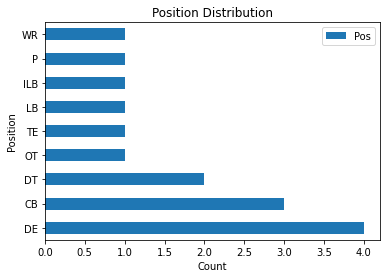

In [5]:
rosters['Pos'].sample(15, random_state=42).value_counts().plot.barh(title='Position Distribution')

plt.xlabel('Count')
plt.ylabel('Position')
plt.legend()

### Team Distribution

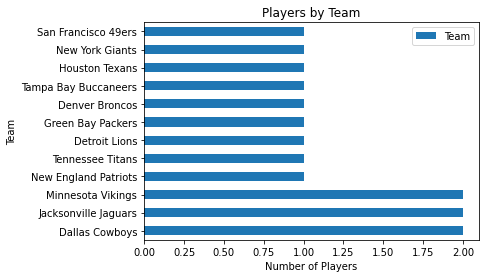

In [6]:
rosters['Team'].sample(15, random_state=42).value_counts().plot.barh(title='Players by Team')

plt.xlabel('Number of Players')
plt.ylabel('Team')
plt.legend()

### Position x Team Comparison

In [7]:
wash = rosters.tail(15)
ariz = rosters.head(15)

rosters_mod = pd.concat([wash, ariz])

<AxesSubplot:xlabel='Team', ylabel='count'>

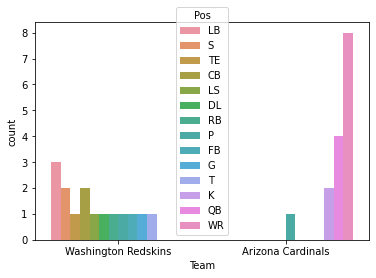

In [8]:
sns.countplot(
    x='Team',
    hue='Pos',
    data=rosters_mod
)

## Salaries

In [9]:
salaries_mod = salaries.head(25)
salaries_mod.head()

,Rk,Player,Pos,Tm,Cap Hit
0,1.0,Kirk Cousins,QB,WAS,23943600
1,2.0,Trumaine Johnson,CB,LAR,16742400
2,3.0,Josh Norman,CB,WAS,16500000
3,NaN,Von Miller,LB,DEN,16500000
4,5.0,Justin Houston,LB,KAN,16350000


Text(0, 0.5, 'Number of Players')

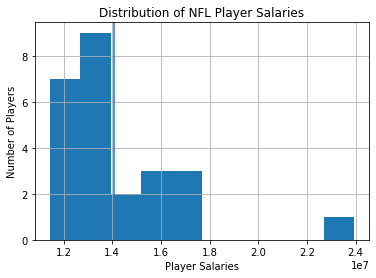

In [10]:
salaries_mod['Cap Hit'].hist(bins=10)
plt.axvline(salaries_mod['Cap Hit'].mean())
plt.title('Distribution of NFL Player Salaries')
plt.xlabel('Player Salaries')
plt.ylabel('Number of Players')

## Stadiums

In [11]:
stadiums.head()

,NAME,LATITUDE,LONGITUDE,TEAM
0,Lincoln Financial Field,39.90147,-75.16729,Philadelphia Eagles
1,Qualcomm Stadium,32.78322,-117.11976,San Diego Chargers
2,Bank of America Stadium,35.22584,-80.85331,Carolina Panthers
3,Jacksonville Municipal Stadium,30.32387,-81.63690,Jacksonville Jaguars
4,Soldier Field,41.86250,-87.61677,Chicago Bers


In [12]:
zipped_stadiums = zip(stadiums.LATITUDE, stadiums.LONGITUDE, stadiums.TEAM)

In [13]:
usa_center = (37.1369916,-103.8264166)

usa_map = folium.Map(
    location=usa_center,
    zoom_start=4,
    tiles='Stamen Terrain'
)

for lat, long, team in zipped_stadiums:
    folium.CircleMarker(
        location=(lat, long),
        popup=team,
        fill=True
    ).add_to(usa_map)

usa_map